In [0]:
from google.colab import files

In [5]:
files.upload()

Saving GOLD.csv to GOLD.csv


{'GOLD.csv': b'Date,Price,Open,High,Low,Vol.,Change %,Pred,new\n"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.57074041034866\n"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430175937443\n"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.12371427554538\n"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.29806419293527\n"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.15331832314767\n"May 11, 2017",28022,27995,28100,27945,9.72K,0.05%,149.0,182.42708892467274\n"May 12, 2017",28019,28088,28195,27985,9.48K,-0.01%,167.0,141.25513668036362\n"May 15, 2017",28008,28049,28157,27996,8.76K,-0.04%,22.0,120.06900985855101\n"May 16, 2017",28109,28025,28159,28025,7.73K,0.36%,34.0,218.40164139161428\n"May 17, 2017",28614,28170,28638,28170,15.92K,1.80%,420.0,919.3763578274776\n"May 18, 2017",28710,28666,28980,28551,23.80K,0.34%,234.0,475.38909320164015\n"May 19, 2017",28634,28660,28779,28531,13.16K,-0.26%,345.0,222.89530685920545\n"May 22

In [0]:
import pandas as pd
import numpy as np

In [0]:
data=pd.read_csv("GOLD.csv")

In [43]:
data.head()

Date  Price   Open   High    Low    Vol. Change %   Pred         new
0  May 04, 2017  28060  28400  28482  28025   0.08K   -1.79%  738.0  117.570740
1  May 05, 2017  28184  28136  28382  28135   0.06K    0.44% -146.0  295.430176
2  May 08, 2017  28119  28145  28255  28097   7.85K   -0.23%   30.0  132.123714
3  May 09, 2017  27981  28125  28192  27947  10.10K   -0.49%  357.0  101.298064
4  May 10, 2017  28007  28060  28146  27981   9.28K    0.09%  124.0  112.153318

In [0]:
NullData=data[data['Pred'].isnull()]

In [45]:
NullData.head()

Date  Price   Open   High  ...    Vol. Change % Pred         new
411  Dec 11, 2018  31812  31850  31850  ...  10.53K   -0.26%  NaN  195.423493
412  Dec 12, 2018  31626  31749  31749  ...   7.57K   -0.58%  NaN   44.232664
413  Dec 13, 2018  31414  31550  31600  ...   8.43K   -0.67%  NaN  127.646233
414  Dec 14, 2018  31437  31440  31514  ...   6.75K    0.07%  NaN  127.219539
415  Dec 17, 2018  31501  31369  31530  ...   5.97K    0.20%  NaN  372.603976

[5 rows x 9 columns]

## Preparing the data for Training the model.

In [0]:
data=data.dropna(axis=0,subset=['Pred'])

In [47]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            401, 402, 403, 404, 405, 406, 407, 408, 409, 410],
           dtype='int64', length=411)

In [48]:
NullData.shape[0]+NullData.index[0]

512

In [0]:
def Data_Prep(df):
  for i in range(df.index[0],df.shape[0]+df.index[0]):
    df['Change %'][i]=float(df['Change %'][i][0:-1])


  for i in range(df.index[0],df.shape[0]):

    df['Vol.'][i]=float(df['Vol.'][i][0:-1])*1000
  return(df)

In [50]:
X=Data_Prep(data)
X=X.drop(['new','Date','Pred','Change %'],axis=1)
y=data['Pred']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import statsmodels.api as sm

from math import sqrt

In [52]:
X.head()

Price   Open   High    Low   Vol.
0  28060  28400  28482  28025     80
1  28184  28136  28382  28135     60
2  28119  28145  28255  28097   7850
3  27981  28125  28192  27947  10100
4  28007  28060  28146  27981   9280

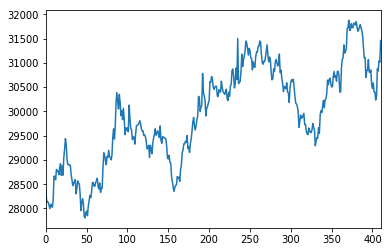

In [53]:
X['Open'].plot(gid=True)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [0]:
model=LinearRegression()

In [56]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred=model.predict(x_test)

In [58]:
sqrt(mean_squared_error(y_test,pred))

3.2988980238666794e-12

## Lets use some preprocessing and cross validation techniques

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [0]:
model1=LinearRegression()

In [62]:
model1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred=model1.predict(x_test)

In [64]:
sqrt(mean_squared_error(y_test,pred))

6.686636923888467e-12

## Predicting Null Values

In [65]:
NullData.head()

Date  Price   Open   High  ...    Vol. Change % Pred         new
411  Dec 11, 2018  31812  31850  31850  ...  10.53K   -0.26%  NaN  195.423493
412  Dec 12, 2018  31626  31749  31749  ...   7.57K   -0.58%  NaN   44.232664
413  Dec 13, 2018  31414  31550  31600  ...   8.43K   -0.67%  NaN  127.646233
414  Dec 14, 2018  31437  31440  31514  ...   6.75K    0.07%  NaN  127.219539
415  Dec 17, 2018  31501  31369  31530  ...   5.97K    0.20%  NaN  372.603976

[5 rows x 9 columns]

In [66]:
NullData=Data_Prep(NullData)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
NullData=NullData.drop(['new','Date','Pred','Change %'],axis=1)

In [71]:
NullData.head()

Price   Open   High    Low    Vol.
411  31812  31850  31850  31618  10.53K
412  31626  31749  31749  31582   7.57K
413  31414  31550  31600  31337   8.43K
414  31437  31440  31514  31384   6.75K
415  31501  31369  31530  31291   5.97K

In [73]:
for i in range(NullData.index[0],NullData.shape[0]+NullData.index[0]):
  NullData['Vol.'][i]=float(NullData['Vol.'][i][0:-1])*1000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
NullData['Pred']=model.predict(NullData)

In [75]:
NullData.head()

Price   Open   High    Low   Vol.   Pred
411  31812  31850  31850  31618  10530  852.0
412  31626  31749  31749  31582   7570  422.0
413  31414  31550  31600  31337   8430  530.0
414  31437  31440  31514  31384   6750  144.0
415  31501  31369  31530  31291   5970  415.0

## NiftyData

In [0]:
nifty=pd.read_csv('Nifty50.csv')

In [0]:
Stock=pd.read_csv('PNB.csv')

In [78]:
nifty.head()

Date     Open     High  ...    Close  Shares Traded  Turnover (Rs. Cr)
0  15-May-2017  9433.55  9449.25  ...  9445.40      145163953            7790.97
1  16-May-2017  9461.00  9517.20  ...  9512.25      171709433            9209.89
2  17-May-2017  9517.60  9532.60  ...  9525.75      211856040           10726.23
3  18-May-2017  9453.20  9489.10  ...  9429.45      199340647           10782.46
4  19-May-2017  9469.90  9505.75  ...  9427.90      259861396           11544.77

[5 rows x 7 columns]

## Getting Data For last 3 months

In [79]:
Stock[Stock['Date']=='13-Feb-2019'].index

Int64Index([436], dtype='int64')

## Calculating daily Beta value for the past 3 months

In [0]:
Stock=Stock[436:]

In [0]:
nifty=nifty[436:]

In [82]:
Stock.shape

(58, 15)

In [83]:
nifty.shape

(58, 7)

In [0]:
monthly_prices = pd.concat([Stock['Close Price'], nifty['Close']], axis=1)
monthly_prices.columns = ['PNB', 'Nifty']

In [85]:
monthly_prices.head()

PNB     Nifty
436  69.45  10793.65
437  72.25  10746.05
438  70.05  10724.40
439  69.00  10640.95
440  69.95  10604.35

In [0]:
monthly_returns = monthly_prices.pct_change(1)

In [87]:
clean_monthly_returns = monthly_returns.dropna(axis=0)  # drop first missing row
print(clean_monthly_returns.head())

          PNB     Nifty
437  0.040317 -0.004410
438 -0.030450 -0.002015
439 -0.014989 -0.007781
440  0.013768 -0.003440
441  0.016440  0.012363


In [0]:
X = clean_monthly_returns['Nifty']
y = clean_monthly_returns['PNB']


In [89]:
X1 = sm.add_constant(X)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
model = sm.OLS(y, X1)


In [0]:
results = model.fit()


In [92]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    PNB   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     26.12
Date:                Sun, 18 Aug 2019   Prob (F-statistic):           4.17e-06
Time:                        10:45:20   Log-Likelihood:                 139.95
No. Observations:                  57   AIC:                            -275.9
Df Residuals:                      55   BIC:                            -271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.003      0.542      0.5

## Monthly beta